
# Cognitive Algorithms - Assignment 2 
Cognitive Algorithms        
Summer Term 2020      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Respective quiz due on May 20, 2020 23:55 via ISIS**

**Answer the questions on Isis in 'Assignment 2 - Quiz' and copy code from this notebook where necessary.**

---

# Programming

*Please keep in mind, that we will deduct one point for each unnecessary loop.*     

In this assignment you will compare the three linear classification algorithms that you encountered in the lecture - the Perceptron, the Nearest Centroid Classifier (NCC) and the Linear Discriminant Analysis (LDA). This comparision is done on a toy data set.
Your task will be to implement LDA and use the provided code to compare the algorithms.
  
*Below you can find the provided code. Change the code only where indicated.*

---

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

plt.style.use('ggplot')

---
## Classifiers

### Task 1 - Implement LDA
Implement a linear discriminant analysis (LDA) classifer by completing the function stub ```train_lda```.
Remember how the weight $\textbf{w}$ and the bias $\beta$ are calculated for given class means $\textbf{w}_o,\textbf{w}_\Delta \in \mathbb{R}^d$ in comparison to the NCC
\begin{align}
    \textbf{w} &= \Sigma_X^{-1}(\textbf{w}_o - \textbf{w}_\Delta) \\
    \beta &= \textbf{w}^T \left(\frac{\textbf{w}_o + \textbf{w}_\Delta}{2}\right)
        + \log\left( \frac{n_\Delta}{n_o} \right).
\end{align}

In [ ]:
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''

    # hint: to calculate the covariance use np.cov(...)
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?

    # your code here
    

    w_plus =  np.zeros((X.shape[0]))
    w_minus = np.zeros((X.shape[0]))
    counterplus = 0
    counterminus = 0
    for i in range(0, len(Y)):
        if(Y[i] == 1):
            counterplus +=1
            w_plus += X[:, i]
        else:
            counterminus +=1
            w_minus += X[:, i]
    w_plus = w_plus/counterplus
    w_minus = w_minus/counterminus

    #splus = np.zeros((2,2))
    #sminus = np.zeros((2,2))
    #for i in range(0, len(Y)):
    #    if(Y[i] == 1):
    #        
    #        splus += (X[:, i]-w_plus).dot((X[:, i]-w_plus).transpose())
    #   else:
    #       
    #       sminus += (X[:, i]-w_minus).dot((X[:, i]-w_minus).transpose())
    # sw = (1/(counterplus*2) * splus) + (1/(counterminus*2) * sminus)
    # print(sw)

    pos = X[:, Y>0]
    neg = X[:, Y<0]

    covpos = np.cov(pos)
    covmin = np.cov(neg)

    
    covall = (covpos + covmin)/2

    w_plus2 = w_plus + (w_plus-w_minus)
    w_minus2 = w_minus -(w_plus-w_minus)

    
    
    w = np.linalg.pinv(covall).dot(w_plus-w_minus)
    w2 = np.linalg.pinv(covall).dot(w_plus2-w_minus2)

    print(w)
    print(w2)
    
    beta2 = w2.transpose().dot((w_plus2 + w_minus2)/2) + np.log(counterminus/counterplus)
    beta = w.transpose().dot((w_plus + w_minus)/2) + np.log(counterminus/counterplus)
    print(beta)
    print(beta2)
    return w, beta



    

In [ ]:
def train_perceptron(X,Y,iterations=200,eta=.1):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
    '''
    #include the bias term by adding a row of ones to X 
    X = np.concatenate((np.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = np.ones((X.shape[0]))/X.shape[0]
    for it in np.arange(200):
        # indices of misclassified data
        wrong = (np.sign(weights.dot(X)) != Y).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            m = wrong[np.random.randint(0, wrong.shape[0])]
            #update weight vector (use variable learning rate (eta/(1.+it)) )
            weights = weights  + (eta/(1.+it)) * X[:, m] * Y[m]; 
            # compute accuracy
            wrong = (np.sign(weights.dot(X)) != Y).nonzero()[0]
    b = -weights[0] 
    w = weights[1:]
    
    return w,b

In [ ]:
def train_ncc(X,Y):
    ''' Trains a nearest centroid classifier
    Definition:  w, b = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    #class means
    mupos = np.mean(X[:, Y>0], axis=1)
    muneg = np.mean(X[:, Y<0], axis=1)
    
    #weight vector and bias term
    w = mupos - muneg
    w /= np.linalg.norm(w)
    b = (w.dot(mupos) + w.dot(muneg)) / 2.
    
    return w, b

---

## Comparison of the classifiers

In the following we provide functions to load or generate data and visualize it.

In [ ]:
def generate_gaussian(N=1000, mean=None, cov=None):
    ''' Gernerate data from multivariate normal distribution
    Definition: X = generate_gaussian(N=1000)
    Input:      N - number of samples
    Output:     X - DxN array with N d-dimensional data points
    '''
    if cov is None:
        cov = np.array([[3., 1.], [1., 1.5]])
    if mean is None:
        mean = np.array([-2., 0.5])
    return np.random.multivariate_normal(mean, cov, N).T

In [ ]:
def acc(out, y):
    ''' Calculate the accuracy '''
    return 50 * (np.mean(out[y > 0] > 0) + np.mean(out[y < 0] < 0))

In [ ]:
def prepare_plot(func, X, Y):
    ''' visualize a binary classifier function and return training accuracy '''
    
    mean_tar = np.mean(X[:, Y>0], axis=1)
    mean_non = np.mean(X[:, Y<0], axis=1)
    
    w, b = func(X, Y)
    
    # plot data points
    kwargs = {'s': 16, 'alpha': 0.5}
    plt.scatter(X[0, Y>0], X[1, Y>0], label='class $o$', **kwargs)
    plt.scatter(X[0, Y<0], X[1, Y<0], label='class $\Delta$', **kwargs)

    kwargs = {'s': 30, 'color': 'black'}
    plt.scatter([mean_tar[0], mean_non[0]], [mean_tar[1], mean_non[1]], **kwargs)

    # calculate decision boundary
    R = np.array([[0, -1], [1, 0]])
    w_orth = R.dot(w)
    m = w_orth[1] / w_orth[0]
    n = b / w[1]
    t = np.linspace(-10, 10, 100)
    y_t = m * t + n
    
    # plot boundary
    plt.plot(t, y_t, 'y', label='decision boundary')
    
    # plot axis settings
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    
    # plot labeling
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc='upper left')
    
    return acc(w.T.dot(X)-b, Y)

In [ ]:
def compare_classifiers():
    '''For testing purposes'''
    
    # number of samples for test and training purposes
    Ntr = 1000
    
    # prepare data
    mean_tar = np.array([-1., .5])
    mean_non = np.array([2., -1.])
    
    np.random.seed(280220)
    X_tar = generate_gaussian(N=Ntr, mean=mean_tar)
    X_non = generate_gaussian(N=Ntr, mean=mean_non)
    np.random.seed()
    y_tar = np.ones(X_tar.shape[1])
    y_non = -np.ones(X_non.shape[1])
    
    X = np.concatenate((X_tar, X_non), axis=1)
    Y = np.concatenate((y_tar, y_non))
    
    plt.figure(figsize=(6, 18))

    plt.subplot(3, 1, 1)
    plt.title(f"Perceptron - accuracy={round(prepare_plot(train_perceptron, X, Y))}%")
    
    plt.subplot(3, 1, 2)
    plt.title(f"NCC - accuracy={round(prepare_plot(train_ncc, X, Y))}%")

    plt.subplot(3, 1, 3)
    plt.title(f"LDA - accuracy={round(prepare_plot(train_lda, X, Y))}%")
    
    plt.show()

### Task 2 - Run compare_classifiers

Test your LDA implementation with the provided function ```compare_classifiers```. It generates a 2D toy data set and plots the resulting separating hyperplanes for the three linear classification methods.

You can execute the cell with Ctrl+Return serveral times several times in a row.<br>
Keep track of the classification boundaries. How do they change in every iteration?

[-1.68104672  1.92953255]
[-5.04314016  5.78859764]
-1.3925244736297502
-4.177573420889248


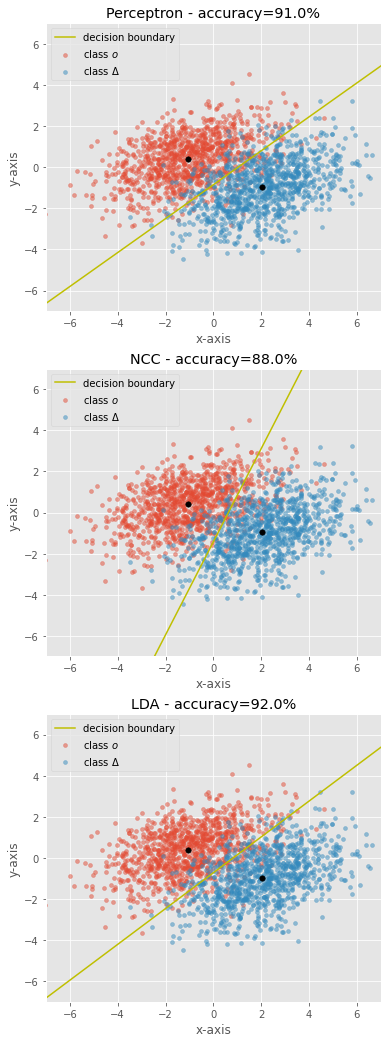

In [ ]:
compare_classifiers()

### Task 3 - Modify LDA (optional)
Remove the log term of your LDA function and compare it with the previous output.